In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Extract the zip
import zipfile
z = zipfile.ZipFile('archive.zip')

z.extractall()

In [10]:
# Renaming the images
folder = 'brain_tumor_dataset/yes/'
count = 1
for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_ " + str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the Yes folder ")

All files are renamed in the Yes folder 


In [11]:
folder = 'brain_tumor_dataset/no/'
count = 1
for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_ " + str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the No folder ")

All files are renamed in the No folder 


In [12]:
#EDA(Exploratory Data Analysis)

In [54]:
listyes = os.listdir("augmented_data/yes")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/yes")
number_files_no = len(listno)
print(number_files_no)

930
930


Text(0.5, 1.0, 'Count of brain Tumor Images')

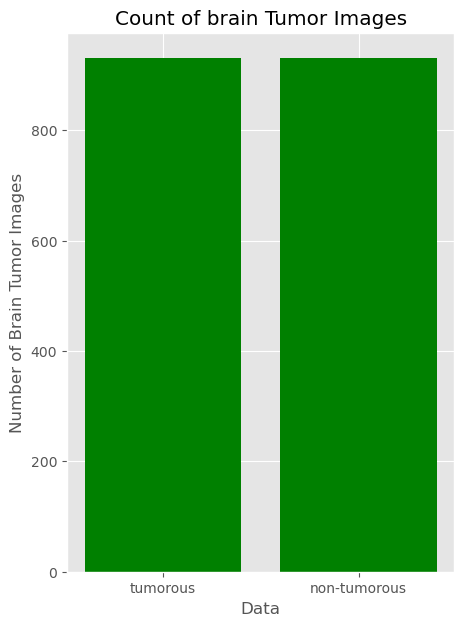

In [58]:
# plot
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))
plt.bar(typex, values, color="green")
plt.xlabel("Data")
plt.ylabel("Number of Brain Tumor Images")
plt.title("Count of brain Tumor Images")

In [16]:
#Data Augmentation

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [39]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [44]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>=n_generated_samples:
                break

In [45]:
import time
start_time = time.time()

yes_path = 'brain_tumor_dataset/yes' 
no_path = 'brain_tumor_dataset/no'

augmented_data_path = 'augmented_data/'

augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:1:10.504280805587769


In [49]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/" 
    no_path  = "augmented_data/no/"
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    n = n_pos + n_neg
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    
    print(f"Number of Total samples {n}")
    print(f"Number of Positives samples {n_pos} Percentage: {pos_per}%")
    print(f"Number of Negatives samples {n_neg} Percentage: {neg_per}%")
    

In [50]:
data_summary(augmented_data_path)

Number of Total samples 1812
Number of Positives samples 930 Percentage: 51.324503311258276%
Number of Negatives samples 882 Percentage: 48.675496688741724%


In [59]:
#Data Preprocessing

In [60]:
#Convert BGR to GRAY
#GaussianBlur
#Threshold
#Erod erosions
#Dilate dilations 
#Find Contours

In [147]:
import imutils
def crop_brain_tumor(image, plot):
    import cv2
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    return new_image

In [148]:
img = cv2.imread('augmented_data/yes/aug_Y_ 99_0_8808.jpg')
crop_brain_tumor(img, True)

array([[[28, 30, 30],
        [28, 30, 30],
        [28, 30, 30],
        ...,
        [26, 28, 28],
        [26, 28, 28],
        [26, 28, 28]],

       [[28, 30, 30],
        [28, 30, 30],
        [29, 31, 31],
        ...,
        [26, 28, 28],
        [26, 28, 28],
        [26, 28, 28]],

       [[28, 30, 30],
        [29, 31, 31],
        [29, 31, 31],
        ...,
        [27, 29, 29],
        [26, 28, 28],
        [26, 28, 28]],

       ...,

       [[32, 34, 34],
        [31, 33, 33],
        [30, 32, 32],
        ...,
        [32, 34, 34],
        [27, 29, 29],
        [27, 29, 29]],

       [[30, 32, 32],
        [30, 32, 32],
        [29, 31, 31],
        ...,
        [32, 34, 34],
        [28, 30, 30],
        [27, 29, 29]],

       [[28, 30, 30],
        [28, 30, 30],
        [29, 31, 31],
        ...,
        [31, 33, 33],
        [28, 30, 30],
        [28, 30, 30]]], dtype=uint8)

In [150]:
import os
folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

In [71]:
 #image loading

In [151]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    image_width, image_heigh = image_size
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_heigh), interpolation = cv2.INTER_CUBIC)
            image = image/225.00
            X.append(image)

            if directory [-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X = np.array(X)
    y = np.array(y)

    X,y = shuffle(X, y)
    print(f"Numeber of examples is:  {len(X)}")
    print(f"X shape is:  {X.shape}")
    print(f"y shape is:  {y.shape}")

    return X,y
    

In [152]:
augmented_data_path = 'augmented_data/'
augmented_yes_path = 'augmented_data/yes'
augmented_no_path = 'augmented_data/no'

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240) 

X,y = load_data([augmented_yes_path, augmented_no_path], (IMAGE_WIDTH, IMAGE_HEIGHT))

Numeber of examples is:  1812
X shape is:  (1812, 240, 240, 3)
y shape is:  (1812,)


In [153]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

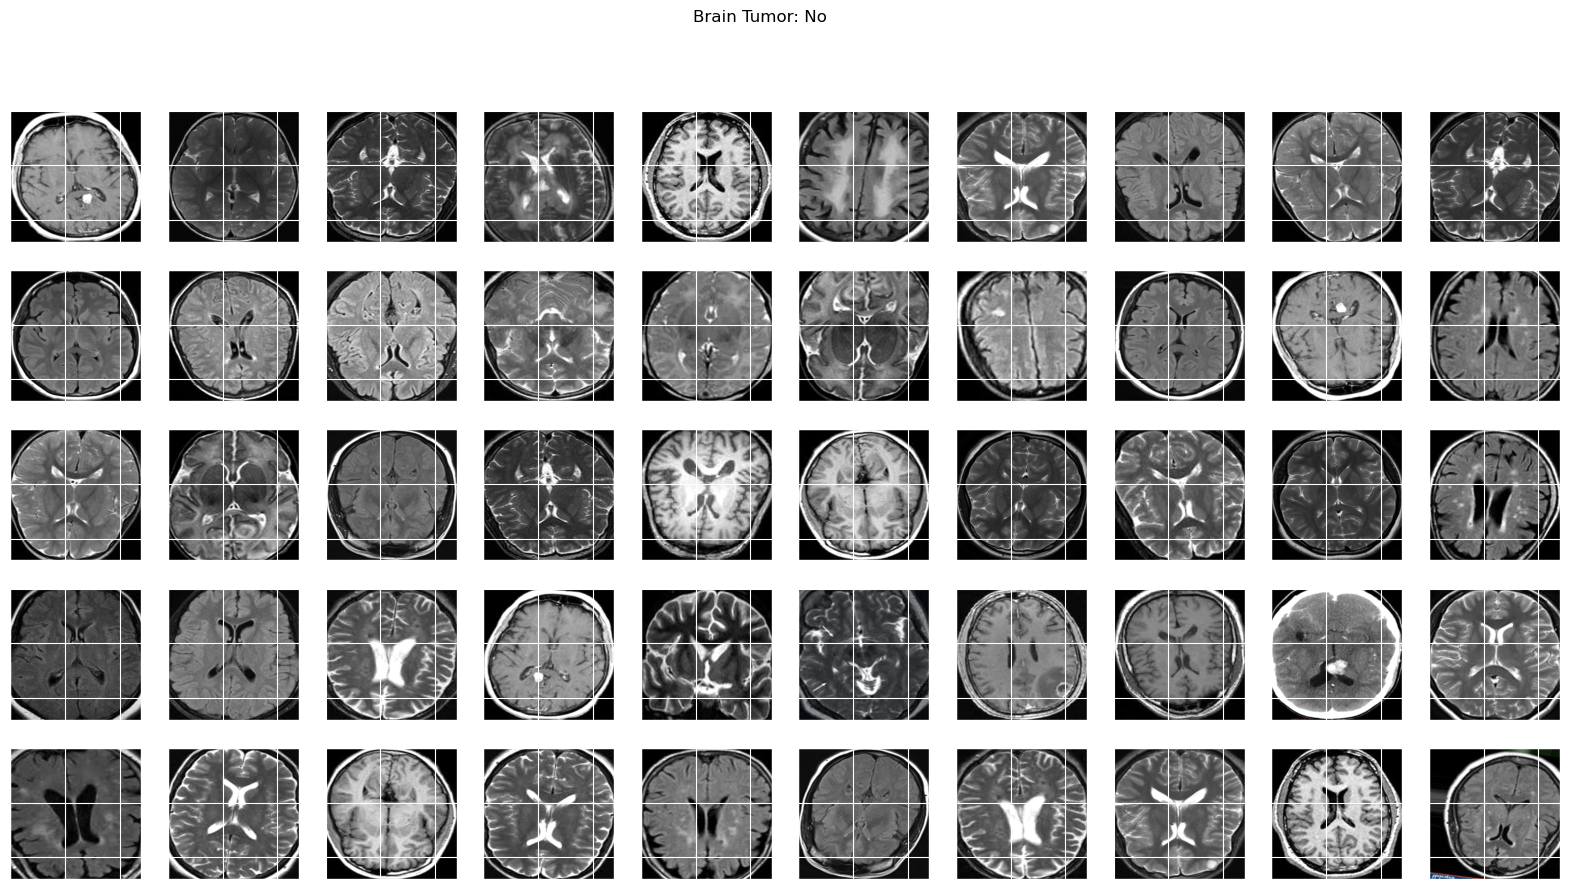

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

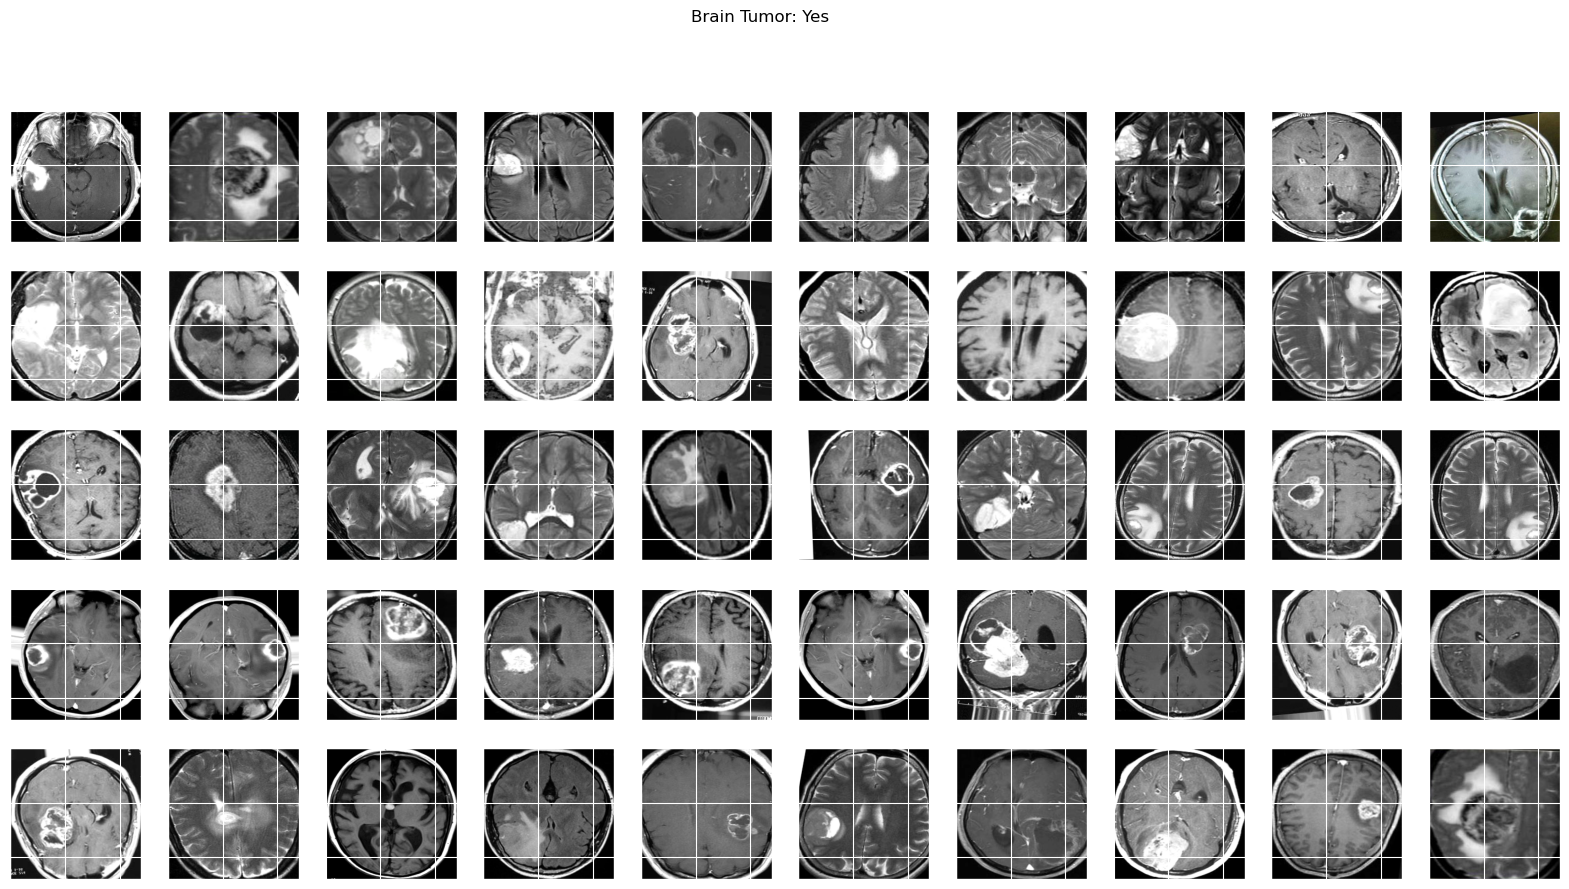

In [81]:
plot_sample_images(X,y)

In [82]:
# Data spliting
# Train
# Test
# Validation

In [154]:
# Definir los nombres de los directorios
base_dir = 'tumorous_and_nontumorous'
sub_dirs = ['train', 'test', 'valid']
categories = ['tumorous', 'nontumorous']

# Crear el directorio base si no existe
os.makedirs(base_dir, exist_ok=True)

# Crear los subdirectorios y categorías
for sub_dir in sub_dirs:
    for category in categories:
        dir_path = os.path.join(base_dir, sub_dir, category)
        os.makedirs(dir_path, exist_ok=True)


In [155]:
original_dataset_tumorours = augmented_yes_path
original_dataset_nontumorours = augmented_no_path

In [158]:
# Directorios de origen y destino
source_dir = 'augmented_data'
destination_dir = 'tumorous_and_nontumorous'

# Subdirectorios
categories = ['yes', 'no']
splits = ['train', 'test', 'valid']

# Proporciones para train, test y valid
train_ratio = 0.8
test_ratio = 0.1
valid_ratio = 0.1

# Función para dividir y copiar las imágenes
def split_and_copy_images(category):
    # Obtener todas las imágenes de la categoría
    images = os.listdir(os.path.join(source_dir, category))
    np.random.shuffle(images)
    
    # Calcular los índices para la división
    total_images = len(images)
    train_idx = int(total_images * train_ratio)
    test_idx = int(total_images * test_ratio) + train_idx
    
    # Dividir las imágenes
    train_images = images[:train_idx]
    test_images = images[train_idx:test_idx]
    valid_images = images[test_idx:]
    
    # Copiar las imágenes a las carpetas correspondientes
    for image in train_images:
        shutil.copy(os.path.join(source_dir, category, image), os.path.join(destination_dir, 'train', category, image))
    
    for image in test_images:
        shutil.copy(os.path.join(source_dir, category, image), os.path.join(destination_dir, 'test', category, image))
    
    for image in valid_images:
        shutil.copy(os.path.join(source_dir, category, image), os.path.join(destination_dir, 'valid', category, image))

# Dividir y copiar las imágenes para cada categoría
for category in categories:
    split_and_copy_images(category)

print("Imágenes copiadas exitosamente.")


Imágenes copiadas exitosamente.


In [96]:
# Model Buliding

In [159]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [160]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32,
                                  target_size=(240,240), class_mode='categorical',
                                  shuffle=True, seed=42, color_mode = 'rgb')

Found 1449 images belonging to 2 classes.


In [161]:
 test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32,
                                  target_size=(240,240), class_mode='categorical',
                                  shuffle=True, seed=42, color_mode = 'rgb')

Found 181 images belonging to 2 classes.


In [162]:
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32,
                                  target_size=(240,240), class_mode='categorical',
                                  shuffle=True, seed=42, color_mode = 'rgb')

Found 182 images belonging to 2 classes.


In [163]:
class_labels = train_generator.class_indices
class_name = {value: key for (key, value) in class_labels.items()}

In [164]:
class_name

{0: 'no', 1: 'yes'}

In [170]:
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)

class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [171]:
# Definir el filepath donde se guardará el modelo
# callback
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [172]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
# Definir la tasa de aprendizaje inicial y el decaimiento
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Configurar el optimizador SGD con el schedule de tasa de aprendizaje
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Compilar el modelo
model_01.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [175]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 10, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4927 - loss: 0.7515
Epoch 1: val_loss improved from 0.67973 to 0.66675, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.4932 - loss: 0.7506 - val_accuracy: 0.6154 - val_loss: 0.6667 - learning_rate: 1.0000e-04
Epoch 2/10


C:\Users\zakar\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6177 - loss: 0.6476
Epoch 2: val_loss did not improve from 0.66675
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.6138 - loss: 0.6491 - val_accuracy: 0.5440 - val_loss: 0.6840 - learning_rate: 1.0000e-04
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5825 - loss: 0.6710
Epoch 3: val_loss improved from 0.66675 to 0.66050, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.5824 - loss: 0.6718 - val_accuracy: 0.5879 - val_loss: 0.6605 - learning_rate: 1.0000e-04
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6329 - loss: 0.6721
Epoch 4: val_loss improved from 0.66050 to 0.63692, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.6316 - loss: 0.6720 - val_accuracy: 0.5934 - val_loss: 0.6369 - learning_rate: 1.0000e-04
Epoch 5/10
 6/10 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5195 - loss: 0.7192

C:\Users\zakar\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 5: val_loss did not improve from 0.63692
10/10 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.5242 - loss: 0.7088 - val_accuracy: 0.5934 - val_loss: 0.6465 - learning_rate: 1.0000e-04
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6395 - loss: 0.6483
Epoch 6: val_loss improved from 0.63692 to 0.63375, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.6402 - loss: 0.6478 - val_accuracy: 0.6429 - val_loss: 0.6337 - learning_rate: 1.0000e-04
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5974 - loss: 0.6673
Epoch 7: val_loss did not improve from 0.63375
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.5988 - loss: 0.6660 - val_accuracy: 0.6319 - val_loss: 0.6517 - learning_rate: 1.0000e-04
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5625 - loss: 0.6803
Epoch 8: val_loss did not improve from 0.63375
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.5625 - loss: 0.6797 - val_accuracy: 0.6429 - va

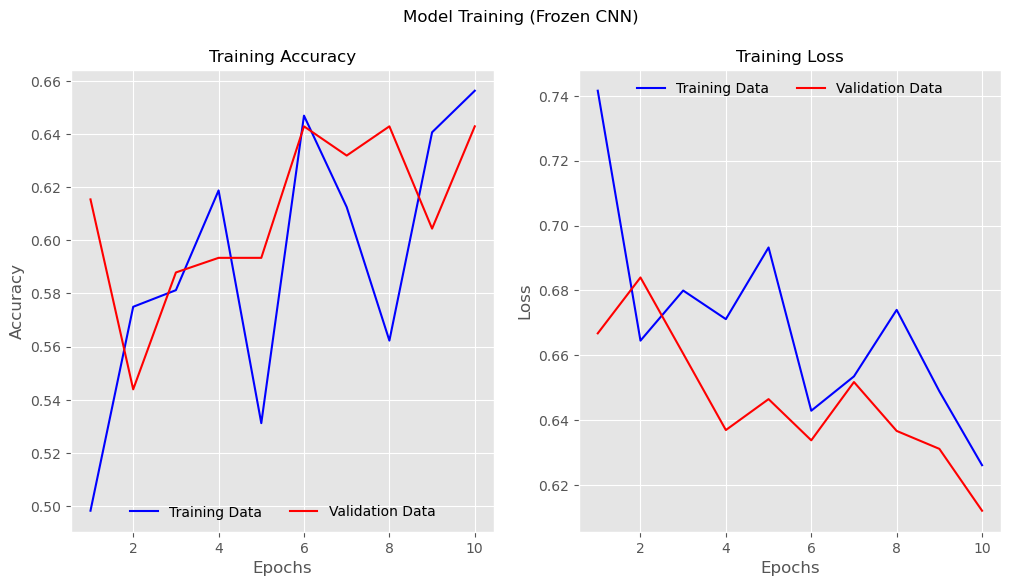

In [176]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [181]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')

# Guardar los pesos del modelo con la extensión correcta
model_01.save_weights(filepath="model_weights/vgg19_model_01.weights.h5", overwrite=True)

In [182]:
model_01.load_weights("model_weights/vgg19_model_01.h5")
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6621 - loss: 0.6061


C:\Users\zakar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.6884 - loss: 0.5912


In [183]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testing Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.5786670446395874
Validation Acc: 0.692307710647583
Testing Loss: 0.589911162853241
Testing Acc: 0.6850828528404236


In [186]:
filenames = test_generator.filenames
nb_sample = len(filenames)

vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose = 1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step


In [187]:
# Increamental unfreezing and fine tuning
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

['input_layer_4',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [188]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights('model_weights/vgg19_model_01.h5')

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [190]:
# Definir la tasa de aprendizaje inicial y el decaimiento
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Configurar el optimizador SGD con el schedule de tasa de aprendizaje
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Compilar el modelo
model_02.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [191]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6590 - loss: 0.5834
Epoch 1: val_loss improved from 0.61203 to 0.57401, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.6579 - loss: 0.5859 - val_accuracy: 0.6978 - val_loss: 0.5740 - learning_rate: 1.0000e-04
Epoch 2/2


C:\Users\zakar\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6661 - loss: 0.6143
Epoch 2: val_loss did not improve from 0.57401
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.6662 - loss: 0.6149 - val_accuracy: 0.6868 - val_loss: 0.5806 - learning_rate: 1.0000e-04


ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

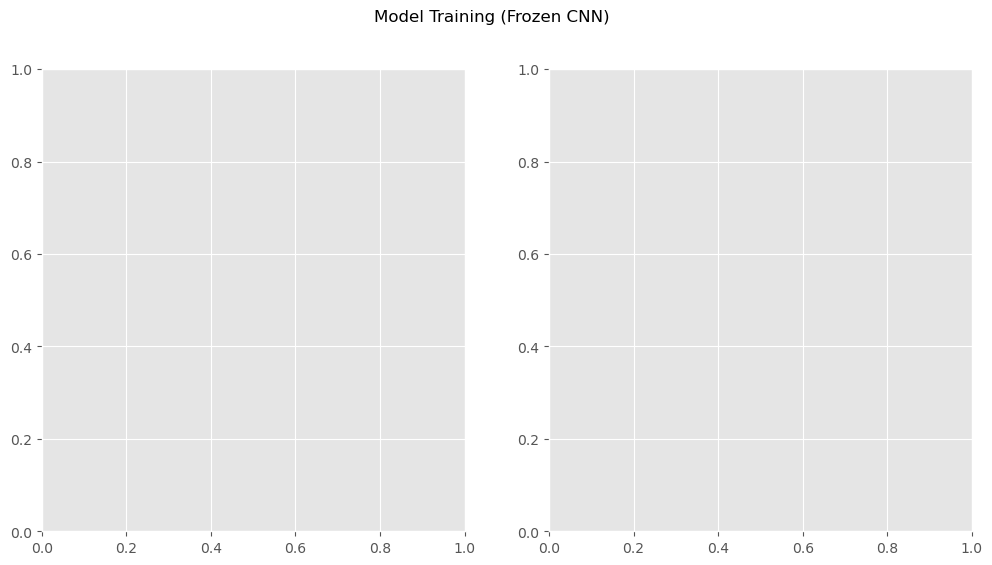

In [192]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [194]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02..weights.h5", overwrite=True)

In [195]:
model_02.load_weights("model_weights/vgg19_model_02.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7774 - loss: 0.4701
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7082 - loss: 0.5466


In [196]:
# Unfreezing the entire network
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights('model_weights/vgg19_model_02.h5')

# Definir la tasa de aprendizaje inicial y el decaimiento
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Configurar el optimizador SGD con el schedule de tasa de aprendizaje
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Compilar el modelo
model_03.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [197]:
model_03.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [198]:
# history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)

In [199]:
model_03.load_weights("model_weights/vgg_unfrozen.h5")
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9302 - loss: 0.1972
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8979 - loss: 0.2638
